In [1]:
# To enable the autocomplete feature based upon clicking the TAB button
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Rest API call

In [3]:
import requests
import json

In [4]:
baseurl = 'http://localhost:8080'
headers = 'application/json'

default_casebase = 'support_prim_cb_latest'
default_concept = 'patient'
default_globalSim='global_sim_1'

default_cases_limit=-1 

### Get all instances from a given casebase - GET call

In [5]:
#%%time
casebase_name_gai = 'support_prim_cb_latest'

def getAllInstances():
    url_gai = baseurl+'/instances?casebaseName='+casebase_name_gai
    
    response_gai = requests.get( url=url_gai)
    
    response_json_gai = response_gai.json()
        
    df_response_gai = pd.DataFrame(response_json_gai)
            
    # for sorting
    # df_response = df_response.sort_values(by=['caseID'], ascending=[False])
    
    return df_response_gai

getAllInstances().head();

In [6]:
instances = getAllInstances()
print( instances.shape)
instances.head()

(258, 11)


,activity_1,age,caseID,gender,gpe_3,hscl10_mean_1,id,oreb_sum_1,pain_duration_1,work_ability_1,work_type_1
0,Slightly reduced,46,patient132,female,1,1.1,281,20,LT 1 month,9,Work demands much walking and lifting
1,Slightly reduced,31,patient253,female,2,1.2,500,_unknown_,1m - LT 3m,9,Mostly seated
2,Slightly reduced,70,patient131,male,2,1.3,280,47,GT 1 year,6,Mostly seated
3,Slightly reduced,37,patient252,female,1,1.8,499,32,LT 1 month,9,Mostly seated
4,Slightly reduced,22,patient130,female,1,1.3,279,16,3 - LT 6m,9,Work demands much walking


In [7]:
case_inst = instances.copy(deep=True)
case_inst = case_inst.set_index( case_inst.caseID )
case_inst.drop( columns='caseID', inplace=True)
case_inst.replace('_unknown_', np.NaN, inplace=True)
case_inst['gpe_3'] = case_inst['gpe_3'].astype(int)
case_inst['gpe_3'] = case_inst['gpe_3'].astype(int)
case_inst.gpe_3.dtype
case_inst.head()

,activity_1,age,gender,gpe_3,hscl10_mean_1,id,oreb_sum_1,pain_duration_1,work_ability_1,work_type_1
caseID,,,,,,,,,,
patient132,Slightly reduced,46,female,1,1.1,281,20,LT 1 month,9,Work demands much walking and lifting
patient253,Slightly reduced,31,female,2,1.2,500,NaN,1m - LT 3m,9,Mostly seated
patient131,Slightly reduced,70,male,2,1.3,280,47,GT 1 year,6,Mostly seated
patient252,Slightly reduced,37,female,1,1.8,499,32,LT 1 month,9,Mostly seated
patient130,Slightly reduced,22,female,1,1.3,279,16,3 - LT 6m,9,Work demands much walking


### Retrieve from dependent casebase - GET call

In [8]:
#http://localhost:8080/expDependentCasebase?casebase=support_prim_cb_latest&concept%20name=patient
#        &amalgamation%20function=global_sim_1&no%20of%20returned%20cases=-1
#        &List%20of%20case%20IDS=patient0%2Cpatient1%2Cpatient2
        
default_list = 'patient0,patient1,patient2'

def executeSimOnAllCases(listOfCases=default_list, cases_limit_rsc=default_cases_limit):
    
    url_rsc = baseurl+'/expDependentCasebase?casebase='+default_casebase+'&concept%20name='+default_concept+'&amalgamation%20function='+default_globalSim+'&no%20of%20returned%20cases='+cases_limit_rsc.__str__()+'&List%20of%20case%20IDS='+listOfCases
    
    response_rsc = requests.get( url=url_rsc)
    
    response_json_rsc = response_rsc.json()
    
    df_response_rsc = pd.DataFrame(response_json_rsc)
    
    return df_response_rsc

### Retrieve from independent casebase - GET call

In [9]:
#http://localhost:8080/expIndependentCasebase?casebase=support_prim_cb_latest&concept%20name=patient
#  &amalgamation%20function=global_sim_1&no%20of%20returned%20cases=-1
#  &List%20of%20case%20IDS%20for%20retrival=patient0%2Cpatient1%2Cpatient2
#  &List%20of%20case%20IDS%20for%20casebase=patient0%2Cpatient1%2Cpatient2%2Cpatient3%2Cpatient4

        
default_retrieval_list = 'patient0,patient1,patient2,patient3'
default_cb_list = 'patient0,patient1,patient2,patient3,patient4,patient5'

def executeSimOnSelectedCases(listOfRetrievalCases=default_retrieval_list, listOfCbCases=default_cb_list, k=default_cases_limit):
    
    url_rsc = baseurl+'/expIndependentCasebase?casebase='+default_casebase+'&concept%20name='+default_concept+'&amalgamation%20function='+default_globalSim+'&no%20of%20returned%20cases='+k.__str__()+'&List%20of%20case%20IDS%20for%20retrival='+listOfRetrievalCases+'&List%20of%20case%20IDS%20for%20casebase='+listOfCbCases
    
    response_rsc = requests.get( url=url_rsc)
    
    response_json_rsc = response_rsc.json()
        
    df_response_rsc = pd.DataFrame(response_json_rsc)

    return df_response_rsc

In [10]:
re_df = executeSimOnSelectedCases()
re_df.head(7)

,patient0,patient1,patient2,patient3
patient0,1.000000,0.183073,0.800557,0.460582
patient1,0.183073,1.000000,0.185206,0.188250
patient2,0.800557,0.185206,1.000000,0.449564
patient3,0.460582,0.188250,0.449564,1.000000
patient4,0.351932,0.373347,0.368306,0.506926
patient5,0.547775,0.329712,0.738756,0.210359


In [11]:
all_cases_ids = getAllInstances().caseID.sort_values()
all_cases_ids = all_cases_ids.reset_index(drop=True) # for reindexing and drop for droping the current index
all_cases_ids;

## Create the retrival set of cases

In [12]:
retrieval_set = all_cases_ids[0:10]
retrieval_set = retrieval_set.tolist()
retrieval_set;

In [13]:
loo_casebase = all_cases_ids[:].tolist()
loo_casebase;

## Create casebase leaving retrival set

In [14]:
import random
def loo_query_n_cb( case_ids_lqc=all_cases_ids, query_size=50):
    query_cases = random.sample( set(case_ids_lqc), k=query_size)
    cb_casses = [x for x in case_ids_lqc if x not in query_cases]
    return query_cases, cb_casses, ','.join(query_cases), ','.join(cb_casses)

In [15]:
qList, cList, queries, casebase, = loo_query_n_cb( query_size=52)
#print(len(qList))
#print(len( casebase.split(',')))
df_q_result = executeSimOnSelectedCases( listOfRetrievalCases=queries, listOfCbCases=casebase, k=1)
df_q_result.dropna( how='all');

In [16]:
df_q_result = executeSimOnSelectedCases( listOfRetrievalCases=queries, listOfCbCases=casebase, k=1)
df_q_result;

In [17]:
def extract_data(data, x):
    query_id = x
    sim_score = data[x].max().round(2)
    case_id = data[x].idxmax()
    q_row = case_inst.loc[query_id,:]
    c_row = case_inst.loc[case_id,:]
    q_id = q_row.id
    c_id = c_row.id
    q_gpe = q_row.gpe_3
    c_gpe = c_row.gpe_3
    q_c_distance = q_gpe - c_gpe
    #print(q_id,'\n')
    return query_id, case_id, sim_score, q_id, c_id, q_gpe, c_gpe, q_c_distance
    

In [27]:
max_sim_id = lambda x : extract_data( df_q_result,x)
full = list(map(max_sim_id, df_q_result.columns))
full = pd.DataFrame(full, columns=['quary_id', 'case_id','sim','q_id', 'c_id','query_gpe','case_gpe','error'])
full

,quary_id,case_id,sim,q_id,c_id,query_gpe,case_gpe,error
0,patient0,patient215,0.83,1,411,3,2,1
1,patient1,patient31,0.70,5,55,2,2,0
2,patient108,patient203,0.93,223,378,3,4,-1
3,patient11,patient19,0.85,21,29,3,4,-1
4,patient111,patient39,0.85,232,74,2,2,0
5,patient130,patient254,0.91,279,501,1,2,-1
6,patient134,patient68,0.90,284,143,2,3,-1
7,patient136,patient218,0.76,286,414,4,3,1
8,patient137,patient191,0.84,287,359,2,2,0
9,patient141,patient27,0.97,293,47,3,3,0


In [19]:
def mse (data):
    m = np.square(data.query_gpe - data.case_gpe)/2
    #print(m)
    return m

In [20]:
def me (data):
    m = (data.query_gpe - data.case_gpe)/2
    #print(m)
    return m

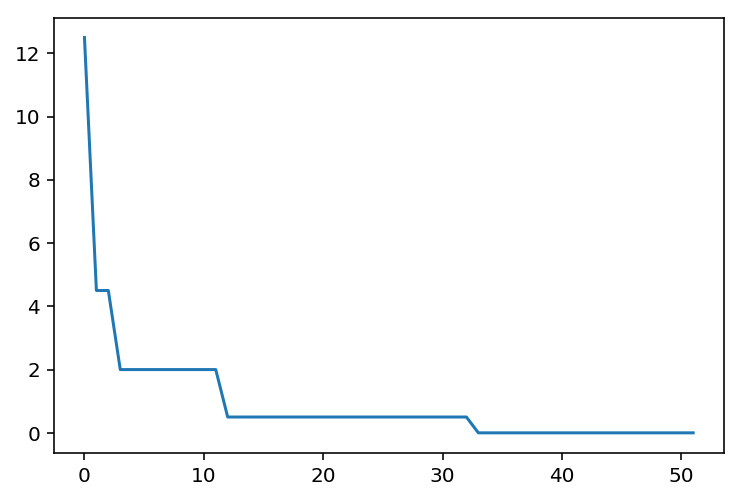

In [21]:
temp = mse(full)
error = temp.values
error[::-1].sort()
error
plt.plot(error)

In [22]:
print( lambda x,y : full[[]])

<function <lambda> at 0x1a13c86510>


In [23]:
df_sim_error_dist = full[['sim','error']]
df_sim_error_dist.error = (df_sim_error_dist.error**2)/2
mi = df_sim_error_dist.error.min()
mx = df_sim_error_dist.error.max()
df_sim_error_dist.error = df_sim_error_dist.error/(mx-mi) # normalized

/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


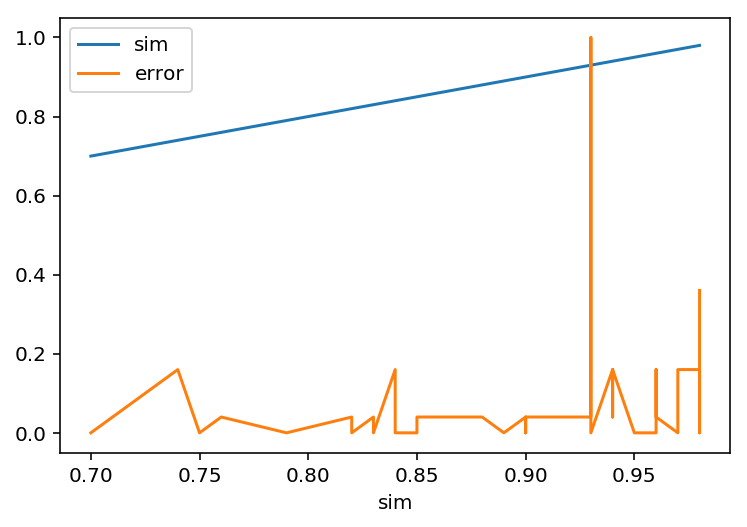

In [24]:
df_sim_error_dist.sort_values( by='sim', ascending=False, inplace=True)
df_sim_error_dist = df_sim_error_dist.set_index( df_sim_error_dist.sim )
df_sim_error_dist.plot()

In [25]:
def itrate():
    qList, cList, queries, casebase, = loo_query_n_cb( query_size=52)
    #print(qList)
    #print(len( casebase.split(',')))
    df_q_result = executeSimOnSelectedCases( listOfRetrievalCases=queries, listOfCbCases=casebase, k=1)
    df_q_result.dropna( how='all')
    
    max_sim_id = lambda x : extract_data( df_q_result,x)
    full = list(map(max_sim_id, df_q_result.columns))
    full = pd.DataFrame(full, columns=['quary_id', 'case_id','sim','q_id', 'c_id','query_gpe','case_gpe','error'])
    
    df_sim_error_dist = full[['sim','error']]
    df_sim_error_dist.error = (df_sim_error_dist.error**2)/2
    mi = df_sim_error_dist.error.min()
    mx = df_sim_error_dist.error.max()
    df_sim_error_dist.error = df_sim_error_dist.error/(mx-mi) # normalized
    
    df_sim_error_dist.sort_values( by='sim', ascending=False, inplace=True)
    df_sim_error_dist = df_sim_error_dist.set_index( df_sim_error_dist.sim )
    df_sim_error_dist.plot()
    return df_sim_error_dist

/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


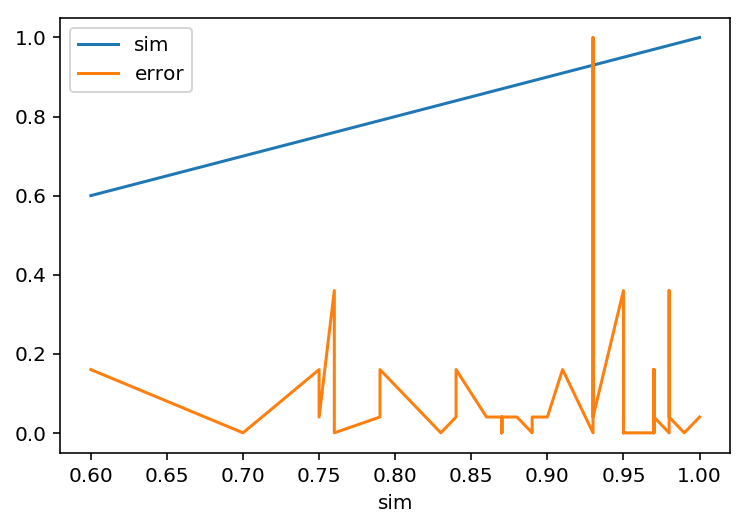

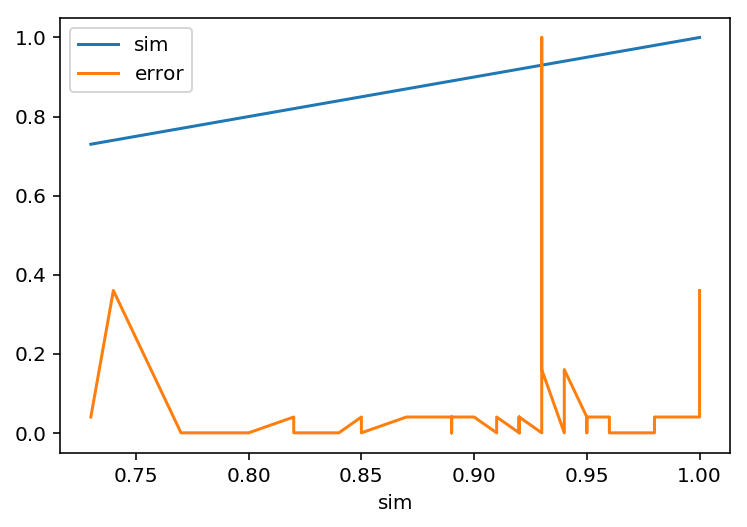

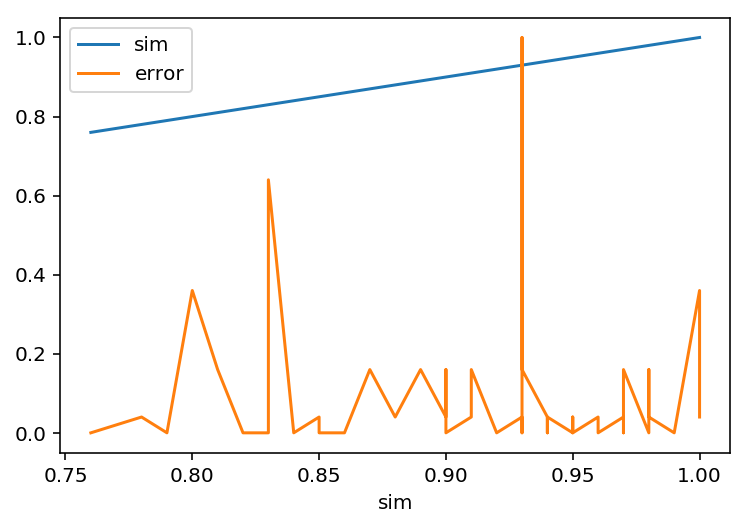

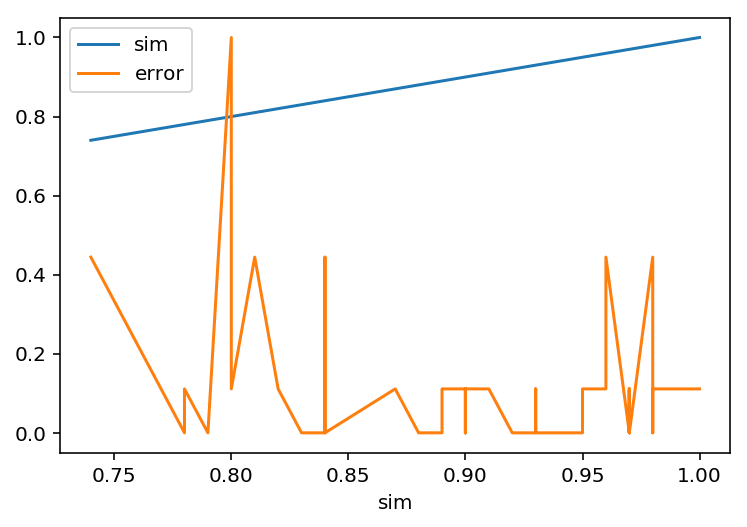

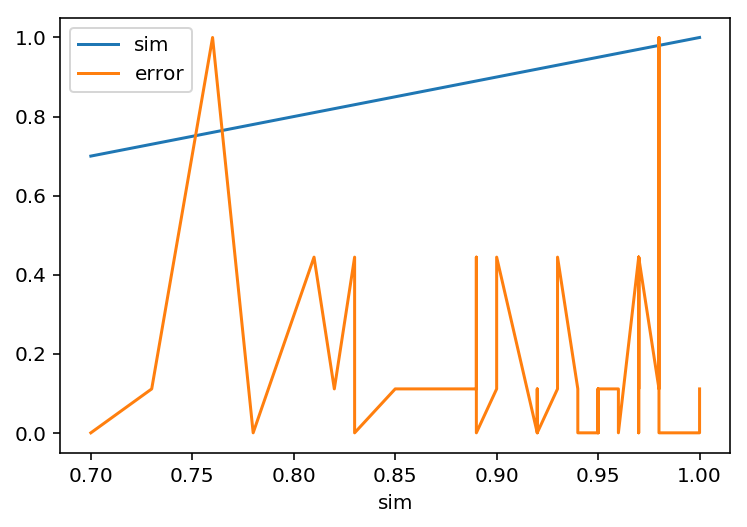

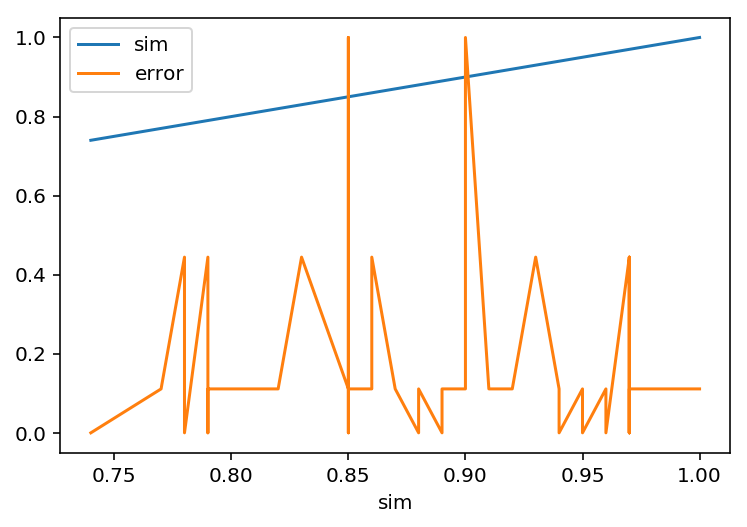

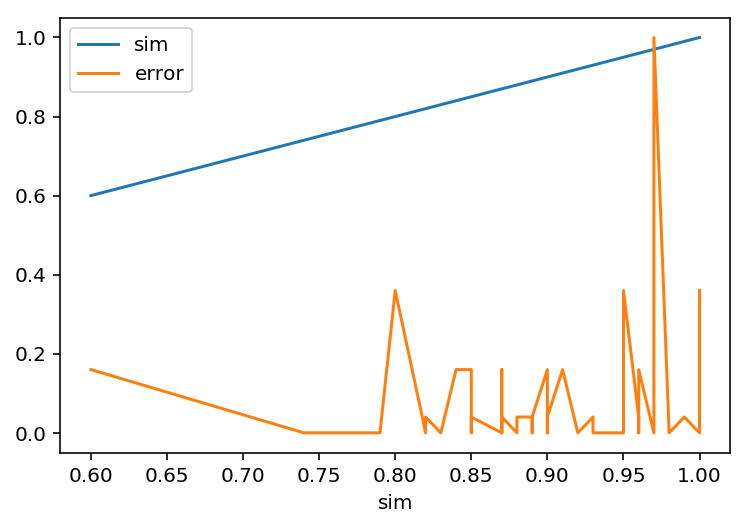

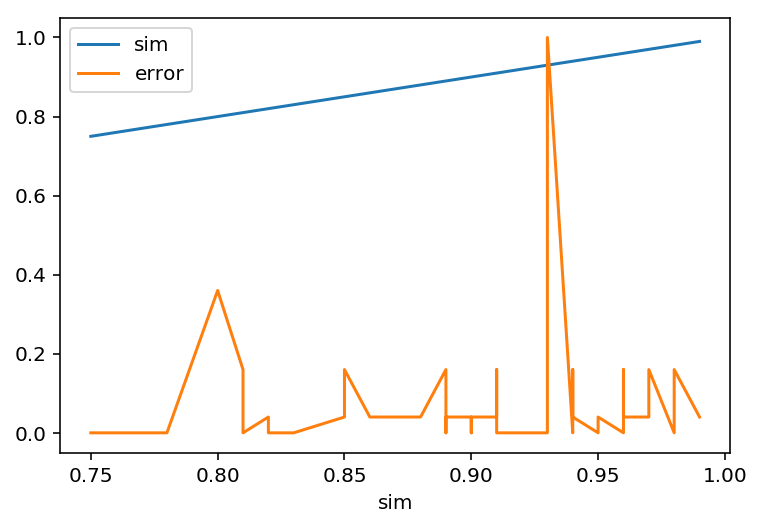

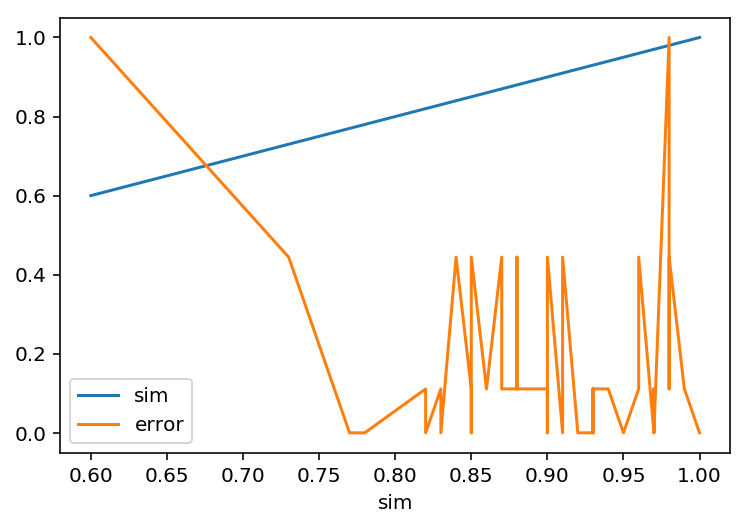

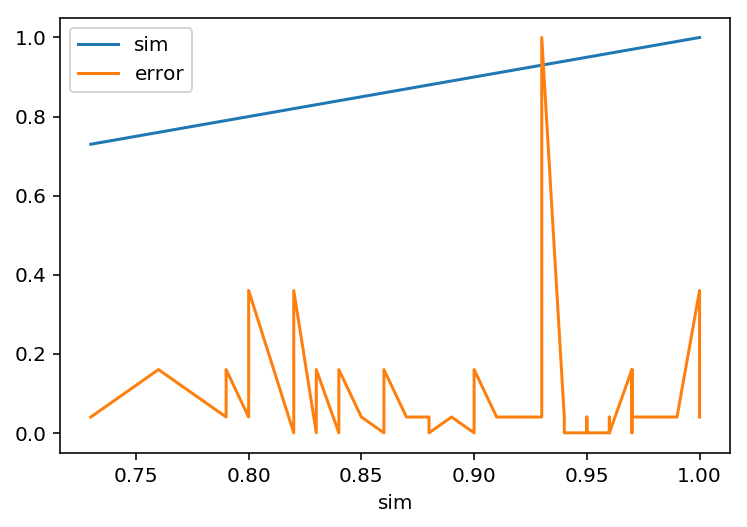

In [26]:
df_1 = itrate()
df_2 = itrate()
df_3 = itrate()
df_4 = itrate()
df_5 = itrate()
df_6 = itrate()
df_7 = itrate()
df_8 = itrate()
df_9 = itrate()
df_10 = itrate()